In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\doshi\Downloads\creditcard.csv")
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [2]:
df.shape

(284807, 31)

In [3]:
df.duplicated().sum()

1081

In [4]:
df=df.drop_duplicates()

In [5]:
df.shape

(283726, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [7]:
inp=df.iloc[:,:-1]
out=df["Class"]
out.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [8]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x,y=ro.fit_resample(inp,out)

In [9]:
y.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [11]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

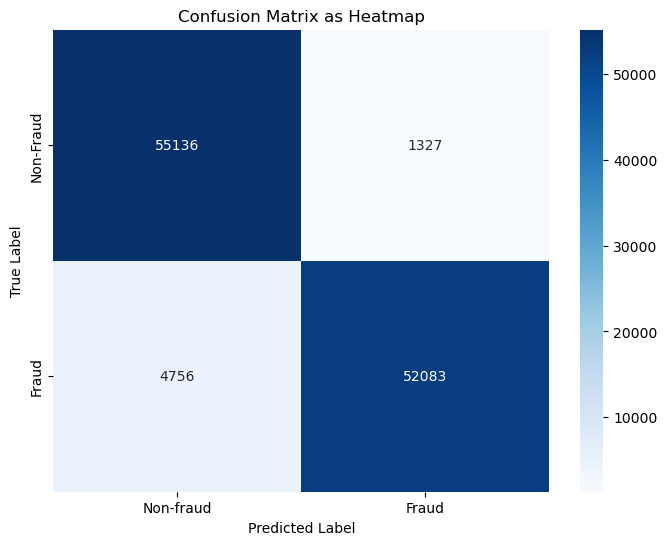

Logistic Regress: 
Training Accuracy:  94.631997952357
Testing Accuracy:  94.63116273322625
Cross Validation:  69.92194257430636  &  73.30125364956417


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56463
           1       0.98      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
train=lr.score(x_train,y_train)*100
test=lr.score(x_test,y_test)*100
cv=cross_val_score(LogisticRegression(),x,y,cv=2)*100

conf_matrix=confusion_matrix(y_test,lr.predict(x_test))
plt.figure(figsize=(8,6))
import seaborn as sns
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Non-fraud","Fraud"],yticklabels=["Non-Fraud","Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix as Heatmap')
plt.show()
print("Logistic Regress: ")
print("Training Accuracy: ",train)
print("Testing Accuracy: ",test)
print("Cross Validation: ",min(cv)," & ",(max(cv)))
print("\n")
print(classification_report(y_test,lr.predict(x_test)))

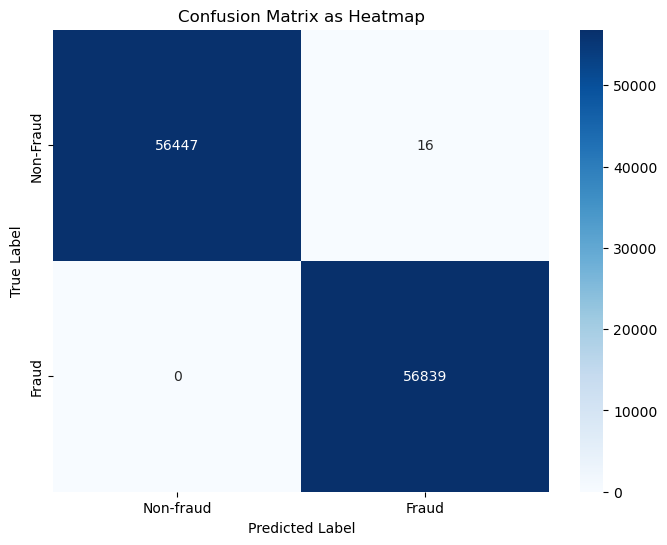

Decision Tree Classifier: 
Training Accuracy:  100.0
Testing Accuracy:  99.9858784487476
Cross Validation:  52.27164407790915  &  52.525833795229005


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
dc=DecisionTreeClassifier(criterion="gini",splitter="best")
dc.fit(x_train,y_train)
train=dc.score(x_train,y_train)*100
test=dc.score(x_test,y_test)*100
cv=cross_val_score(DecisionTreeClassifier(criterion="gini",splitter="best"),x,y,cv=2)*100

conf_matrix=confusion_matrix(y_test,dc.predict(x_test))
plt.figure(figsize=(8,6))
import seaborn as sns
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Non-fraud","Fraud"],yticklabels=["Non-Fraud","Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix as Heatmap')
plt.show()


print("Decision Tree Classifier: ")
print("Training Accuracy: ",train)
print("Testing Accuracy: ",test)
print("Cross Validation: ",min(cv)," & ",(max(cv)))
print("\n")
print(classification_report(y_test,dc.predict(x_test)))

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion="gini",random_state=42)
rfc.fit(x_train,y_train)
train=rfc.score(x_train,y_train)*100
test=rfc.score(x_test,y_test)*100
cv=cross_val_score(RandomForestClassifier(n_estimators=50,criterion="gini"),x,y,cv=2)*100

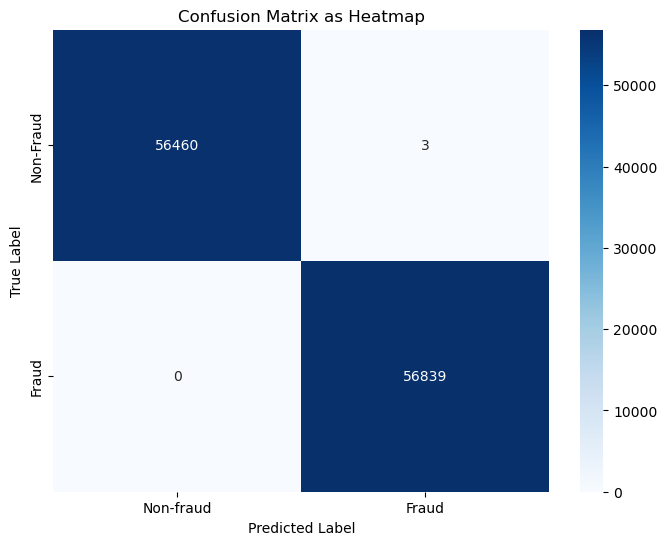

Random Forest Classifier: 
Training Accuracy:  100.0
Testing Accuracy:  99.99735220914017
Cross Validation:  52.80756073192517  &  71.42024974139727


In [16]:
conf_matrix=confusion_matrix(y_test,rfc.predict(x_test))
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Non-fraud","Fraud"],yticklabels=["Non-Fraud","Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix as Heatmap')
plt.show()
print("Random Forest Classifier: ")
print("Training Accuracy: ",train)
print("Testing Accuracy: ",test)
print("Cross Validation: ",min(cv)," & ",(max(cv)))

In [22]:
from sklearn.pipeline import Pipeline,make_pipeline
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num=Pipeline(steps=[("p1",StandardScaler())])
col=ColumnTransformer(transformers=[("num",num,["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"])],remainder="passthrough")
lr=LogisticRegression()
model=Pipeline(steps=[("p2",col),("lr",lr)])
lr.fit(x_train,y_train)
print("Model Accuracy : ",lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100)
model.fit(x,y)
pred=model.predict(x_test)
file=open("credit_card.txt","wb")
pickle.dump(model,file)
file.close()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy :  94.631997952357 94.63116273322625


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
output_df=pd.DataFrame({"Original Output":y_test,"Predicted Output":lr.predict(x_test)})
output_df

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Original Output,Predicted Output
554816,1,1
19821,0,1
184234,0,1
503641,1,1
261118,0,1
...,...,...
194785,0,1
357857,1,1
485557,1,1
258811,0,1


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knc=KNeighborsClassifier(n_neighbors=5)
# knc.fit(x_train,y_train)
# knc.score(x_train,y_train)*100,knc.score(x_test,y_test)*100

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier(n_estimators=50,criterion="gini")
# rfc.fit(x_train,y_train)
# rfc.score(x_train,y_train)*100,rfc.score(x_test,y_test)*100

In [ ]:
# from sklearn.svm import SVC
# svc=SVC(kernel="rbf")
# svc.fit(x_train,y_train)
# svc.score(x_train,y_train)*100,svc.score(x_test,y_test)*100